<h1>Binary genetic code</h1>

In [5]:
#importación
import matplotlib.pyplot as plt
import numpy as np
import math

In [6]:
#Función aleatoria
def fx(x):
    return -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2

In [7]:
#Representamos la función
y_axis = []
x_axis=np.arange(-4,4,1e-1)

for num in x_axis:
    y_axis.append(fx(num))

In [8]:
#Como en binario funciona mejor
def bin_decimal(num_binario):
    binario=0
    for i in range(len(num_binario)):
        binario += num_binario[-i-1]*2**(i)
    return binario

In [9]:
#Ejemplo funcional
individuo = [[-1],[0,1],[1,1,1,0,1,0,1,0,0,1,1,1,0]]
bin_decimal(individuo[0])*(bin_decimal(individuo[1])+(bin_decimal(individuo[2])/(10**len(str(bin_decimal(individuo[2]))))))

-1.7502

In [10]:
poblacion = []
genetic_pool = [1,-1],[0,1],[0,1]
#Población de 100 puntos:
for i in range(100):
    individuo = list([np.random.choice(genetic_pool[0],1),np.random.choice(genetic_pool[1],2),np.random.choice(genetic_pool[2],25)])
    poblacion.append(individuo)
poblacion[:10]

[[array([-1]),
  array([0, 0]),
  array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
         0, 0, 1])],
 [array([1]),
  array([0, 1]),
  array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
         1, 0, 0])],
 [array([-1]),
  array([1, 0]),
  array([1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
         1, 0, 0])],
 [array([1]),
  array([0, 1]),
  array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
         1, 1, 0])],
 [array([1]),
  array([1, 1]),
  array([0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
         0, 0, 0])],
 [array([1]),
  array([1, 0]),
  array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 0])],
 [array([1]),
  array([0, 1]),
  array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
         1, 1, 1])],
 [array([1]),
  array([0, 0]),
  array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
   

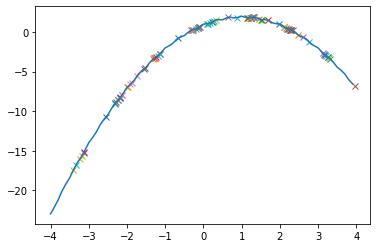

In [11]:
for individuo in poblacion:
    x = bin_decimal(individuo[0])*(bin_decimal(individuo[1])+(bin_decimal(individuo[2])/(10**len(str(bin_decimal(individuo[2]))))))
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [12]:
fitness =[]

for individuo in poblacion:
    x = bin_decimal(individuo[0])*(bin_decimal(individuo[1])+(bin_decimal(individuo[2])/(10**len(str(bin_decimal(individuo[2]))))))
    y = fx(x)
    fitness += [y]
    
fitness = np.array(fitness-min(fitness))

fitness=np.sqrt((fitness/fitness.sum())**2)

In [13]:
fitness[:10]

array([0.01129432, 0.01290951, 0.00618218, 0.01307334, 0.00990391,
       0.01200906, 0.01307754, 0.01267869, 0.00120236, 0.0127396 ])

In [14]:
size_poblacion = len(poblacion)
offspring = []
for j in range(size_poblacion):
    ind_size = len(str(bin_decimal(individuo[2])))
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]

In [15]:
offspring[:10]

[[array([1]),
  array([1, 0]),
  array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
         0, 1, 0])],
 [array([1]),
  array([1, 1]),
  array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
         1, 0, 1])],
 [array([1]),
  array([1, 1]),
  array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
         0, 1, 0])],
 [array([1]),
  array([1, 0]),
  array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
         1, 0, 1])],
 [array([1]),
  array([0, 1]),
  array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
         1, 0, 1])],
 [array([1]),
  array([1, 0]),
  array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
         0, 0, 1])],
 [array([1]),
  array([1, 0]),
  array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
         1, 0, 0])],
 [array([1]),
  array([1, 0]),
  array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
     

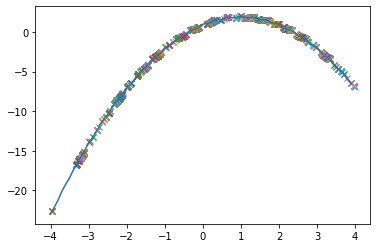

In [16]:
poblacion = offspring
for individuo in poblacion:
    x = bin_decimal(individuo[0])*(bin_decimal(individuo[1])+(bin_decimal(individuo[2])/(10**len(str(bin_decimal(individuo[2]))))))
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [17]:
#No se puede copiar las mutaciones de arriba porque el pool tan solo tiene 1 lista. Está como el culo
def mutate(individuals, prob, pool):
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob:
            mutation = [np.random.choice(pool[0]),np.random.choice(pool[1]),np.random.choice(pool[2])]
            mutate_individual = [mutation] + mutate_individual[1:]
                
            
        individuals[i] = mutate_individual

In [18]:
mutate(poblacion,0.005,genetic_pool)
poblacion[:10]

[[array([1]),
  array([1, 0]),
  array([1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
         0, 1, 0])],
 [array([1]),
  array([1, 1]),
  array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
         1, 0, 1])],
 [array([1]),
  array([1, 1]),
  array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
         0, 1, 0])],
 [array([1]),
  array([1, 0]),
  array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
         1, 0, 1])],
 [array([1]),
  array([0, 1]),
  array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
         1, 0, 1])],
 [array([1]),
  array([1, 0]),
  array([0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
         0, 0, 1])],
 [array([1]),
  array([1, 0]),
  array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
         1, 0, 0])],
 [array([1]),
  array([1, 0]),
  array([1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
     

In [ ]:
#Programa principal y aumento de las generaciones
generaciones = 100

for _ in range(generaciones):
    #Le pongo un contador porque tarda un poco en hacer todas las generaciones
    print(_+1)
    fitness =[]

    #extraigo los valores de y para medir su probabilidad de ser escogidos de nuevo
    for individuo in poblacion:
        x = bin_decimal(individuo[0])*(bin_decimal(individuo[1])+(bin_decimal(individuo[2])/(10**len(str(bin_decimal(individuo[2]))))))
        y = fx(x)
        fitness += [y]

    #convierto fitnees en un vector
    fitness = np.array(fitness-min(fitness))

    #procentajes
    fitness=fitness/fitness.sum()    
        
    size_poblacion = len(poblacion)
    # se reproducen los mejores individuos
    offspring = []
    for i in range(size_poblacion//2):
        parents = np.random.choice(size_poblacion, 2, p=fitness)
        cross_point = np.random.randint(ind_size)
        offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
        offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]    
    
    poblacion = offspring
    
    #####
    # MUTACIONES
    ####
     
    mutate(poblacion,0.005,genetic_pool)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38


In [ ]:
for individuo in poblacion:
    x = bin_decimal(individuo[0])*(bin_decimal(individuo[1])+(bin_decimal(individuo[2])/(10**len(str(bin_decimal(individuo[2]))))))
    y = fx(x)
    plt.plot(x,y,'x')
plt.plot(x_axis,y_axis)

In [ ]:
np.where(fitness == fitness.max())

In [ ]:
individuo = poblacion [4238]

In [ ]:
bin_decimal(individuo[0])*(bin_decimal(individuo[1])+(bin_decimal(individuo[2])/(10**len(str(bin_decimal(individuo[2]))))))